In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from e0_data import Cervical_DataLoader, Bike_DataLoader

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
## Classification Problem
# Explore the dataset - Risk Factors for Cervical Cancer
data_loader = Cervical_DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(686, 17)
(172, 17)


In [3]:
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)

After oversampling: (1286, 17)


In [4]:
# Classification Moldes
import xgboost
from xgboost import XGBClassifier

In [5]:
xgbc = XGBClassifier(random_state=2022)
xgbc.fit(X_train, y_train)
print("Training finished.")

y_pred = xgbc.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.55
Accuracy: 0.93


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

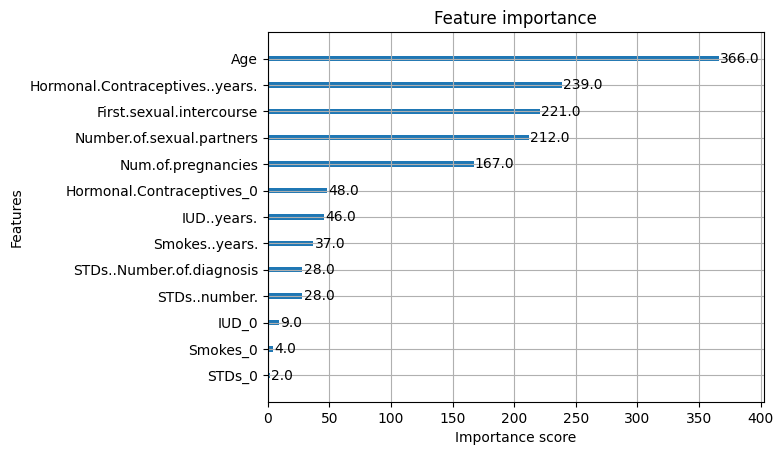

In [6]:
xgboost.plot_importance(xgbc, importance_type='weight')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

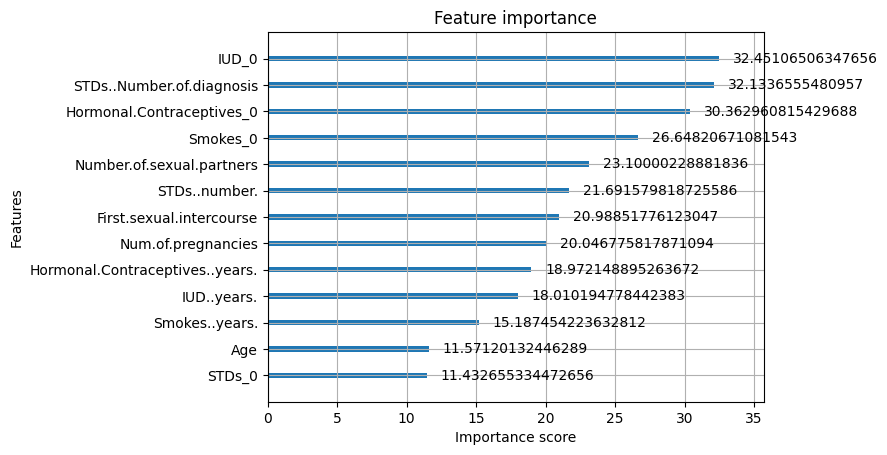

In [7]:
xgboost.plot_importance(xgbc, importance_type='cover')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

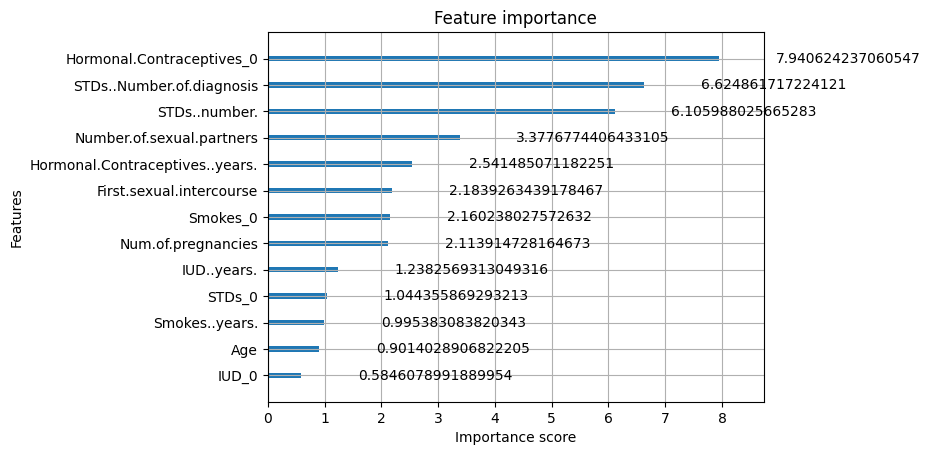

In [8]:
xgboost.plot_importance(xgbc, importance_type='gain')

In [9]:
# Tree SHAP to explain tree model
import shap
shap.initjs()

/Users/liyves/Desktop/py-dev/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer(X=X_test)

In [11]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values.shape}')

length of SHAP values: 172
Shape of each element: (172, 17)


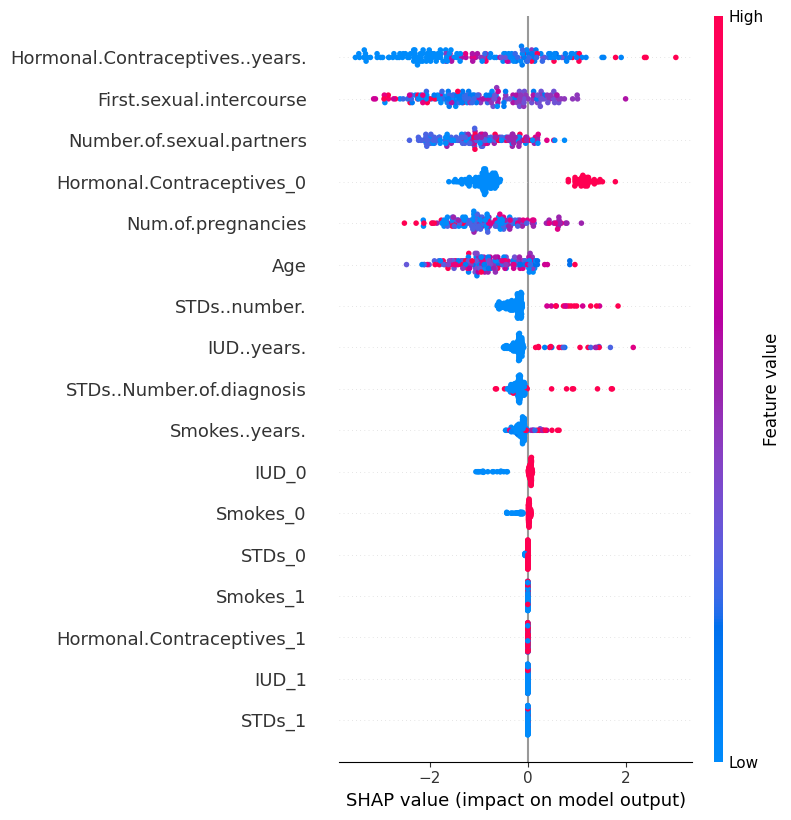

In [12]:
# Global interpretability
shap.summary_plot(shap_values, X_test)

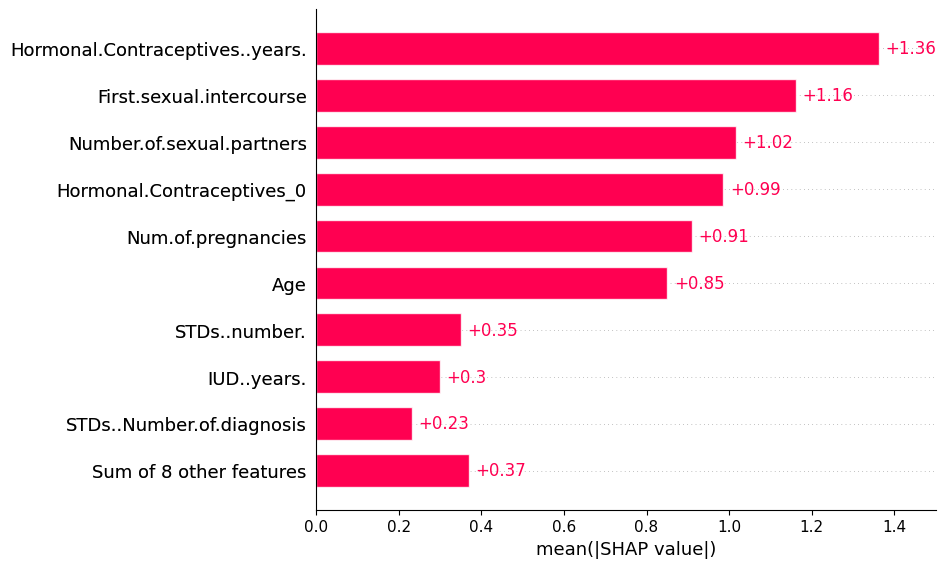

In [13]:
shap.plots.bar(shap_values)

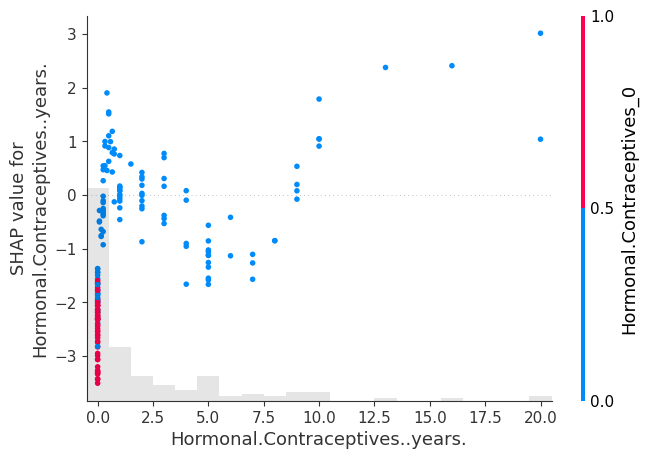

In [14]:
shap.plots.scatter(shap_values[:, "Hormonal.Contraceptives..years."], color=shap_values[:, "Hormonal.Contraceptives_0"])

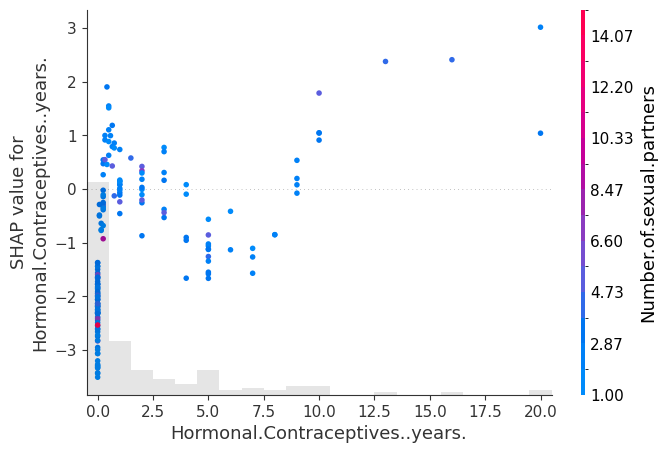

In [15]:
shap.plots.scatter(shap_values[:, "Hormonal.Contraceptives..years."], color=shap_values[:, "Number.of.sexual.partners"])

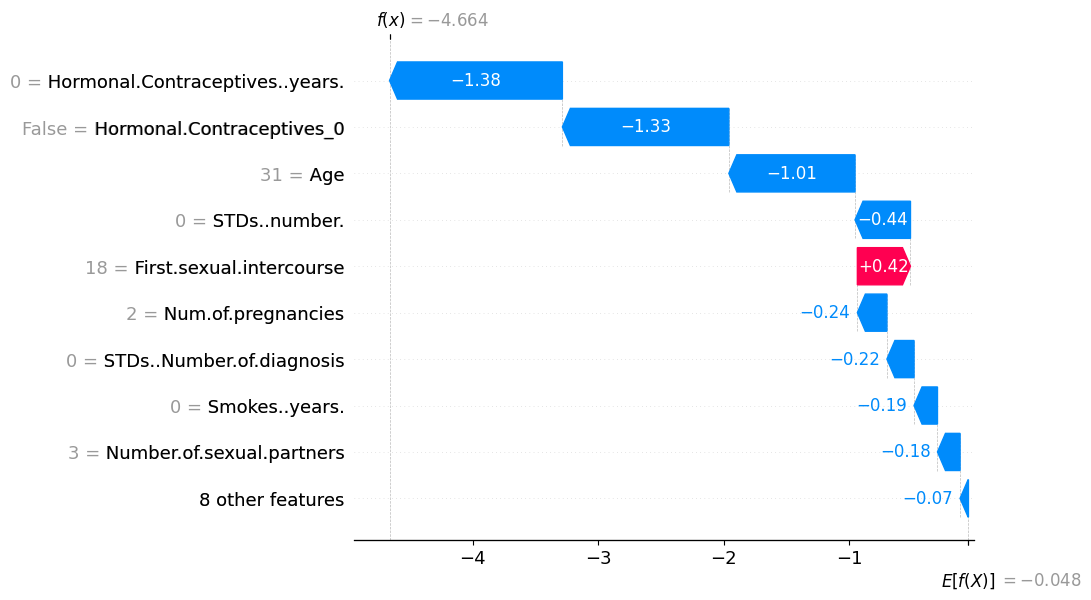

In [16]:
# Local interpretability
shap.plots.waterfall(shap_values[60])

In [17]:
print(f'Prediction for 1st sample in X_test: {xgbc.predict_proba(X_test.iloc[[0], :])[0]}')
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


Prediction for 1st sample in X_test: [9.9973023e-01 2.6974315e-04]


In [18]:
shap.force_plot(explainer.expected_value, shap_values.values, X_test)

In [19]:
## Regression Problem
# Explore the dataset - Bike Rentals
data_loader = Bike_DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
data_loader.data

X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(584, 36)
(147, 36)


In [20]:
# Regression Moldes
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=2022)
xgbr.fit(X_train, y_train)
print("Training finished.")

y_pred = xgbr.predict(X_test)
print(f"Root Mean Squared Error: {round(mean_squared_error(y_test, y_pred)**(1/2), 2)}")
print(f"R2: {round(r2_score(y_test, y_pred), 2)}")

Training finished.
Root Mean Squared Error: 635.92
R2: 0.88


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

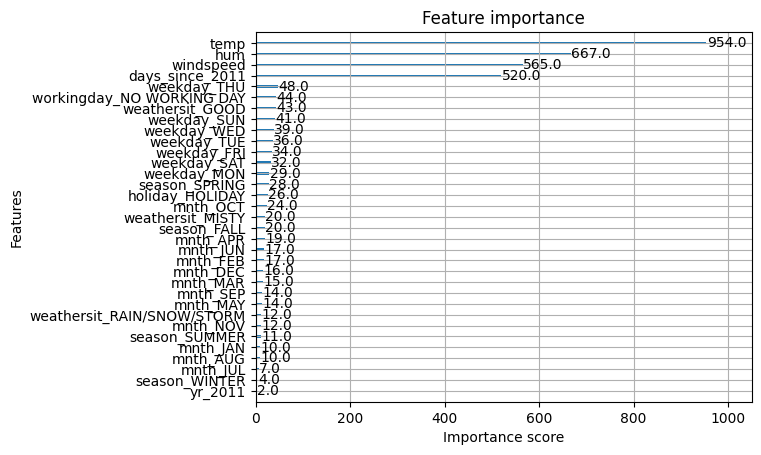

In [21]:
xgboost.plot_importance(xgbr, importance_type='weight')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

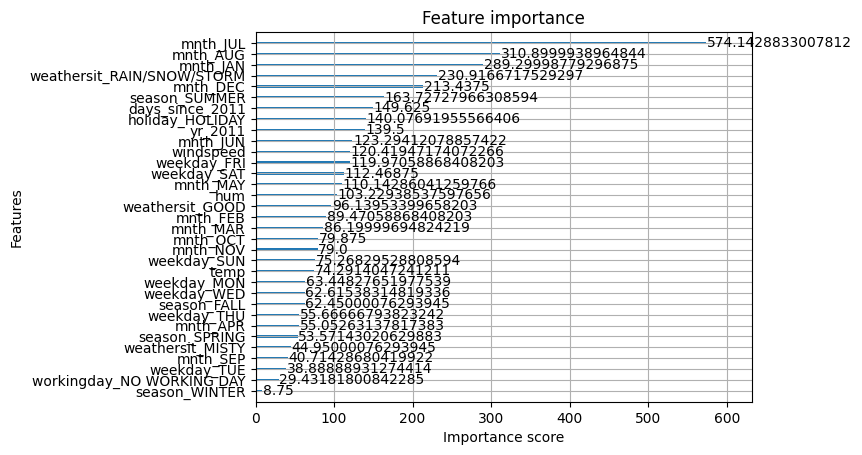

In [22]:
xgboost.plot_importance(xgbr, importance_type='cover')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

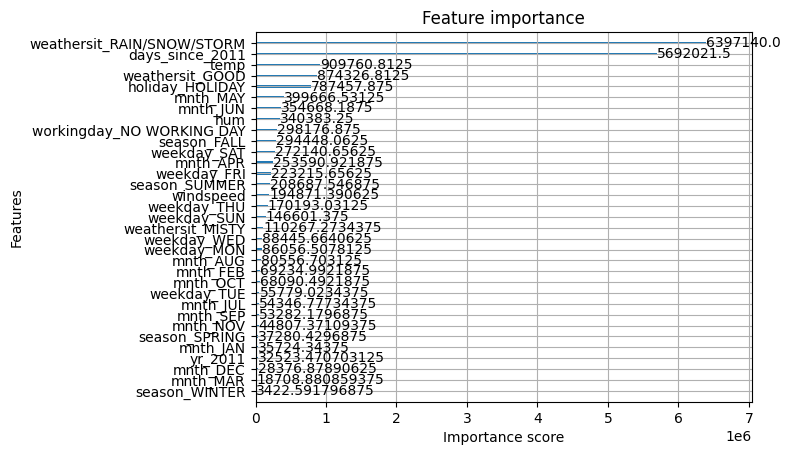

In [23]:
xgboost.plot_importance(xgbr, importance_type='gain')

In [24]:
# Tree SHAP to explain tree model
import shap
shap.initjs()

In [25]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer(X=X_test)

print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values.shape}')

length of SHAP values: 147
Shape of each element: (147, 36)


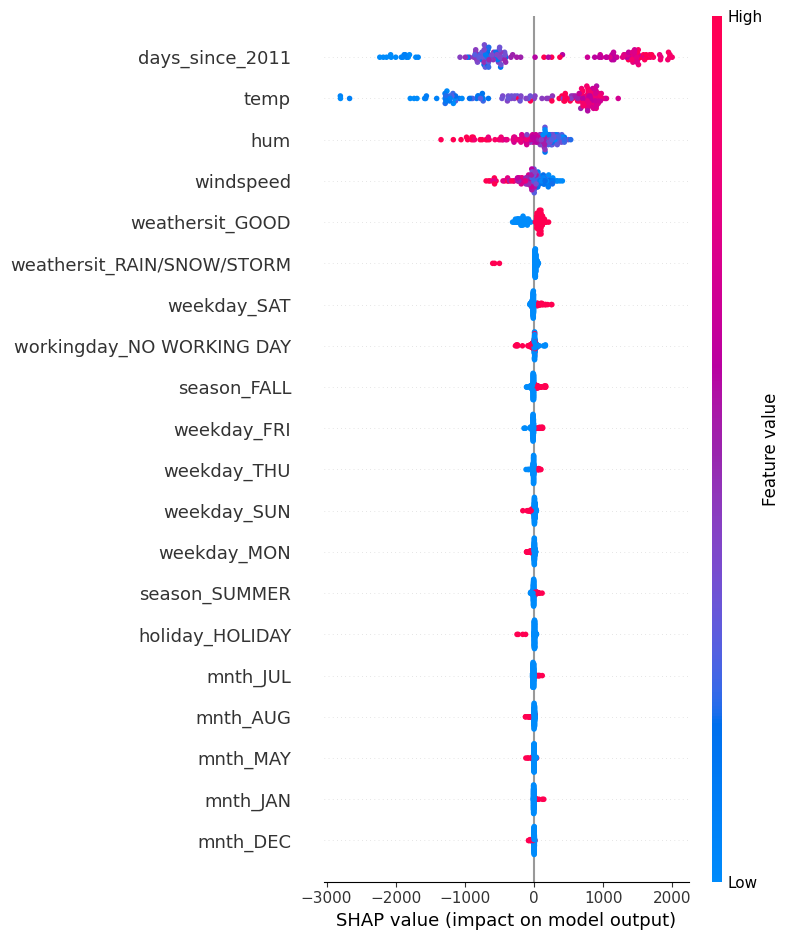

In [26]:
# Global interpretability
shap.summary_plot(shap_values, X_test)

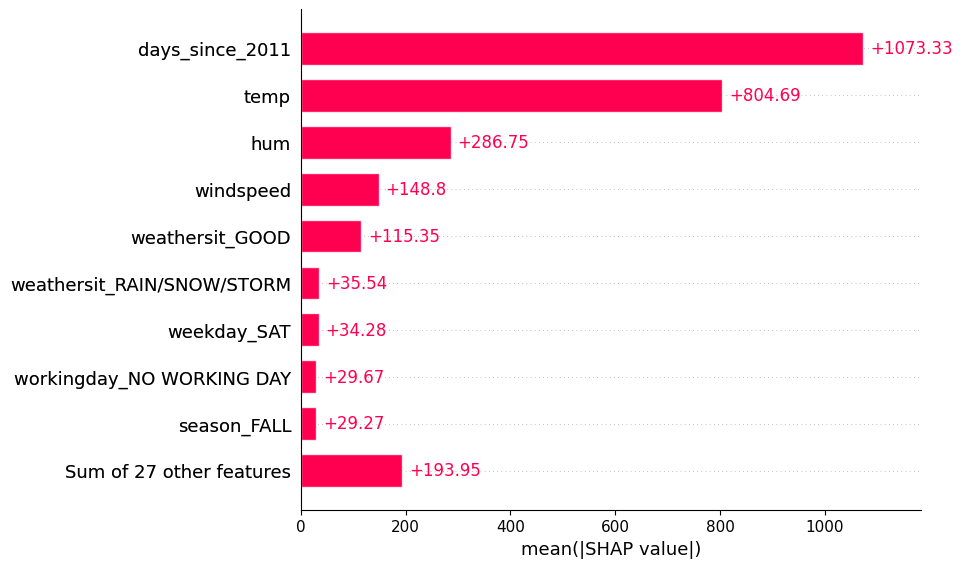

In [27]:
shap.plots.bar(shap_values)

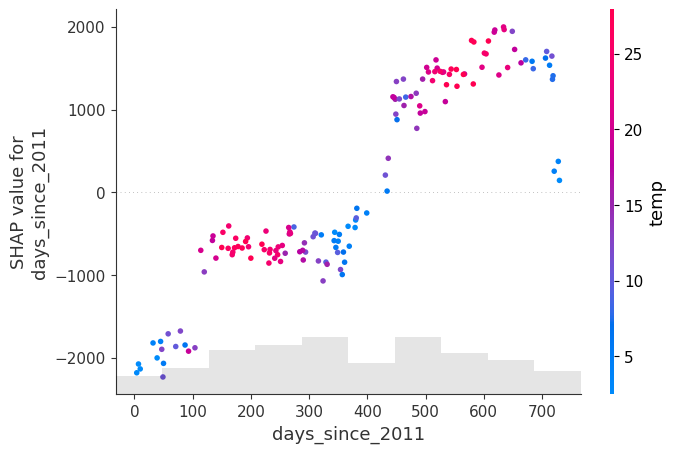

In [28]:
shap.plots.scatter(shap_values[:, "days_since_2011"], color=shap_values[:, "temp"])

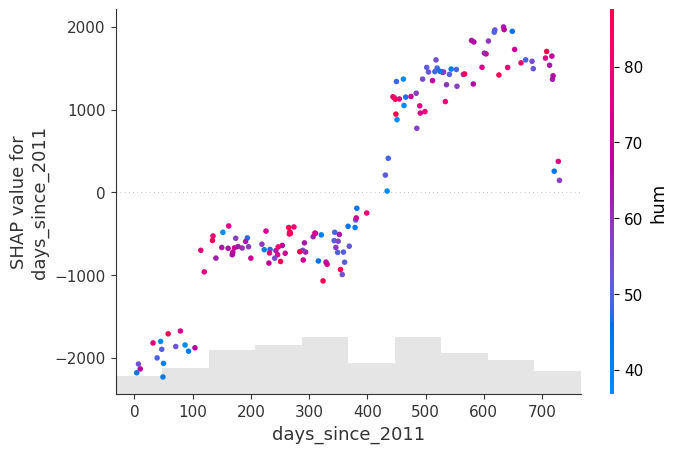

In [29]:
shap.plots.scatter(shap_values[:, "days_since_2011"], color=shap_values[:, "hum"])

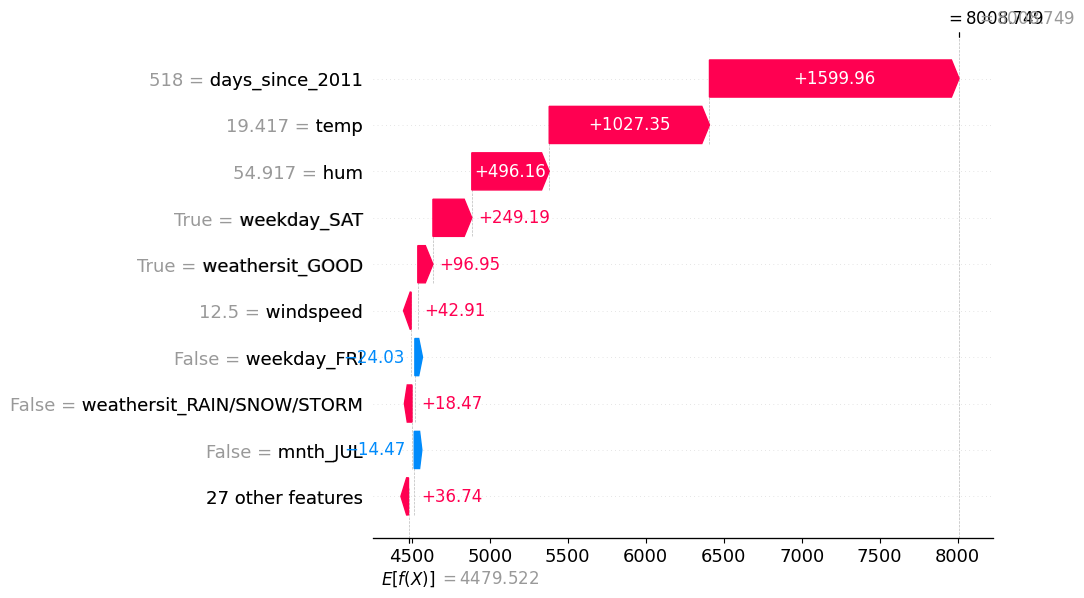

In [30]:
# Local interpretability
shap.plots.waterfall(shap_values[0])

In [31]:
print(f'Prediction for 1st sample in X_test: {xgbr.predict(X_test.iloc[[0], :])[0]}')
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])

Prediction for 1st sample in X_test: 8008.75048828125


In [32]:
shap.force_plot(explainer.expected_value, shap_values.values, X_test)